In [139]:
from activity_1 import variance, arithmetic_average
from activity_2 import confidence_interval
from math import sqrt
from random import expovariate
from queue import Queue
import matplotlib.pyplot as plt

%matplotlib inline

In [124]:
def mser(data, n=5):
    data_size = len(data)
    K = data_size // n
    
    z_values = [
        arithmetic_average(data[i : i+n])
        for i
        in range(0, data_size, n)
    ]
    
    d_values = []
    for d in range(K//2):
        mser_5y = variance(z_values[d:]) / sqrt(K - d)
        d_values.append(mser_5y)
        
    d = d_values.index(min(d_values))
    print(f'The first {n * d} elements have been removed')
    print(f'{data_size - (n * d)} elements left')
    
    return data[d * n:]

In [89]:
def simulate_queue(lambda_, mi, n):
    time_arrival = 1 / lambda_
    time_attendance = 1 / mi
    clock_current = 0
    queue = Queue()
    times_waiting = []
    
    for i in range(n):
        exp_arrival = expovariate(time_arrival)
        exp_attendance = expovariate(time_attendance)
        
        if queue.empty():
            clock_current += exp_arrival
            queue.put(clock_current)
            
        else:
            clock_simulation = clock_current
            
            while clock_current < clock_simulation + exp_arrival and not queue.empty():
                time_waiting = clock_current - queue.get()
                clock_current += exp_attendance
                times_waiting.append(time_waiting)

            if clock_current < clock_simulation + exp_arrival:
                clock_current = clock_simulation + exp_arrival
                queue.put(clock_current)
            else:
                time_to_put = clock_simulation + exp_arrival
                queue.put(time_to_put)

    while not queue.empty():
        time_waiting = clock_current - queue.get()
        clock_current += expovariate(time_attendance)
        times_waiting.append(time_waiting)
        
    return times_waiting

In [216]:
lambda_ = 9.5
mi = 10.0
n = 1000

In [217]:
times_queue = simulate_queue(lambda_, mi, n)
eliminated_transient = mser(times_queue)
conf_interval = confidence_interval(eliminated_transient, 0.95)
mean = arithmetic_average(eliminated_transient)

The first 120 elements have been removed
880 elements left


In [218]:
print(f'Confidence Interval: {conf_interval}')
print(f'Mean: {mean}')

Confidence Interval: (4.359001230667573, 5.5200075597012574)
Mean: 4.939504395184415


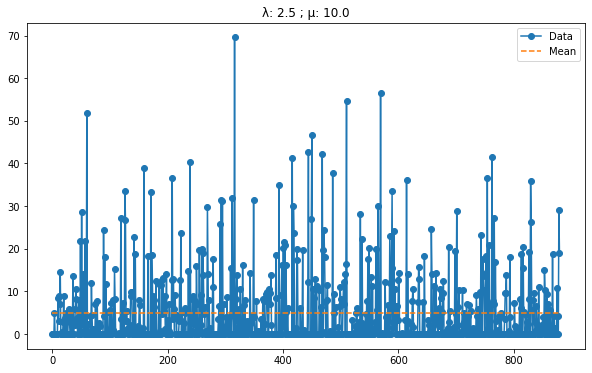

In [219]:
fig,ax = plt.subplots(figsize=(10, 6))
plt.title(f'λ: 2.5 ; μ: 10.0', fontsize=12)
data_line = ax.plot(eliminated_transient, label='Data', marker='o')
mean_line = ax.plot([mean] * len(eliminated_transient), label='Mean', linestyle='--')
legend = ax.legend(loc='upper right')
plt.show()